## Data Exploration

In [1]:
import pandas as pd
# Import package numpy for numeric computing
import numpy as np
# Import package matplotlib for visualisation/plotting
import matplotlib.pyplot as plt

df = pd.read_csv("table_ABT.csv")
df.head()

,Unnamed: 0,Weekday,Date,Time,Room,Room_Type,Capacity,Module,Students,Over_3,Associated,Authenticated,Target
0,0,Friday,2015-11-13,09:00-10:00,B002,Classroom,90,COMP30220,38,0,9,9,0
1,1,Friday,2015-11-13,10:00-11:00,B002,Classroom,90,empty,0,0,17,17,0
2,2,Friday,2015-11-13,11:00-12:00,B002,Classroom,90,COMP30190,29,0,19,19,0
3,3,Friday,2015-11-13,12:00-13:00,B002,Classroom,90,COMP30190,29,0,20,20,0
4,4,Friday,2015-11-13,13:00-14:00,B002,Classroom,90,COMP30170,51,0,16,16,0


In [2]:
#drop first column Unamed:0
df.drop(df.columns[[0]], axis=1, inplace=True)
df.head()

,Weekday,Date,Time,Room,Room_Type,Capacity,Module,Students,Over_3,Associated,Authenticated,Target
0,Friday,2015-11-13,09:00-10:00,B002,Classroom,90,COMP30220,38,0,9,9,0
1,Friday,2015-11-13,10:00-11:00,B002,Classroom,90,empty,0,0,17,17,0
2,Friday,2015-11-13,11:00-12:00,B002,Classroom,90,COMP30190,29,0,19,19,0
3,Friday,2015-11-13,12:00-13:00,B002,Classroom,90,COMP30190,29,0,20,20,0
4,Friday,2015-11-13,13:00-14:00,B002,Classroom,90,COMP30170,51,0,16,16,0


In [3]:
#check the shape of the data frame. 
df.shape

(218, 12)

In [4]:
#check data types
df.dtypes

Weekday           object
Date              object
Time              object
Room              object
Room_Type         object
Capacity           int64
Module            object
Students         float64
Over_3             int64
Associated       float64
Authenticated    float64
Target             int64
dtype: object

In [5]:
#Select all columns of type 'object'
object_columns = df.select_dtypes(['object']).columns
object_columns

Index(['Weekday', 'Date', 'Time', 'Room', 'Room_Type', 'Module'], dtype='object')

In [6]:
#Convert selected columns to type 'category'
for column in object_columns:
    df[column] = df[column].astype('category')
df.dtypes

Weekday          category
Date             category
Time             category
Room             category
Room_Type        category
Capacity            int64
Module           category
Students          float64
Over_3              int64
Associated        float64
Authenticated     float64
Target              int64
dtype: object

<h3>Descriptive Statistics - Categorical Features</h3>

In [7]:
#  Prepare a table with descriptive statistics for all the categorical features.
categorical_features = df.select_dtypes(['category']).describe().T
categorical_features

,count,unique,top,freq
Weekday,218,5,Wednesday,50
Date,218,9,2015-11-11,25
Time,218,8,09:00-10:00,31
Room,218,3,B004,76
Room_Type,218,2,Classroom,142
Module,218,34,empty,59


<h3>Descriptive Statistics - Continuous Features</h3>

In [8]:
# Prepare a table with descriptive statistics for all the continuous features.
# Descriptive stats for all the continuous features.
continuous_features = df.describe().T
continuous_features

,count,mean,std,min,25%,50%,75%,max
Capacity,218,114.403670,33.434197,90,90,90,160.0,160
Students,218,42.811927,44.367926,0,0,32,79.0,139
Over_3,218,0.697248,0.460506,0,0,1,1.0,1
Associated,218,41.729358,34.189566,0,19,33,58.0,232
Authenticated,218,41.518349,34.036469,0,19,33,57.5,230
Target,218,25.802752,22.564247,0,0,25,50.0,100


In [9]:
#check descriptive statistics for each room
group2 = df.groupby('Room')
group3 = group2.describe()
group3.head

<bound method NDFrame.head of             Associated  Authenticated  Capacity     Over_3    Students  \
Room                                                                     
B002 count   74.000000      74.000000        74  74.000000   74.000000   
     mean    29.486486      29.283784        90   0.716216   30.337838   
     std     14.666375      14.645136         0   0.453911   20.587453   
     min      3.000000       3.000000        90   0.000000    0.000000   
     25%     19.000000      18.250000        90   0.000000   18.000000   
     50%     26.500000      26.500000        90   1.000000   29.000000   
     75%     37.750000      37.750000        90   1.000000   45.000000   
     max     76.000000      76.000000        90   1.000000   60.000000   
B003 count   68.000000      68.000000        68  68.000000   68.000000   
     mean    36.044118      35.867647        90   0.705882   34.794118   
     std     24.240360      24.151206         0   0.459033   50.765648   
     min

In [10]:
#Check the unique values of Target feature
df.Target.unique()

array([  0,  25,  50,  75, 100], dtype=int64)

In [11]:
#Check the unique values - Capacity
df.Capacity.unique()

array([ 90, 160], dtype=int64)

In [12]:
#Check the unique values - Module
df.Module.unique()

[COMP30220, empty, COMP30190, COMP30170, COMP30240, ..., COMP30070, COMP20130, COMP47300, COMP30060, COMP10280]
Length: 34
Categories (34, object): [COMP30220, empty, COMP30190, COMP30170, ..., COMP20130, COMP47300, COMP30060, COMP10280]

In [13]:
#Check the unique values - Room
df.Room.unique()

[B002, B004, B003]
Categories (3, object): [B002, B004, B003]

In [14]:
#Check the unique values
df.Room_Type.unique()

[Classroom, Lecture Theatre]
Categories (2, object): [Classroom, Lecture Theatre]

<h3>DATA VISUALISATION</h3>

In [15]:
 # Import package matplotlib for visualisation/plotting
%matplotlib inline

#Import package seaborn to perform data visualisation 
import seaborn as sns
sns.set_style('whitegrid')


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000000086D0278>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000000A5BC2B0>]], dtype=object)

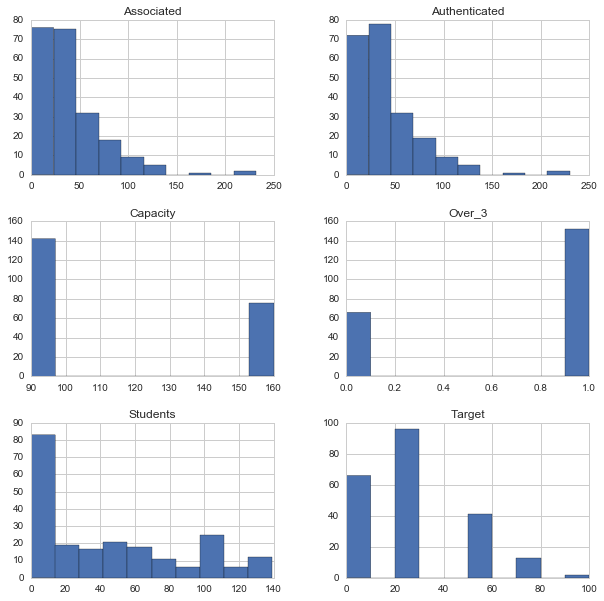

In [16]:
#plot histograms for all continuous features
plt.figure()
df.hist(figsize=(10, 10))

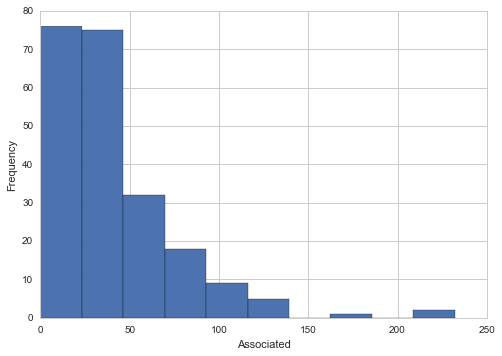

In [17]:
# Plot histogram for variable Associated
df['Associated'].hist()
plt.xlabel('Associated')
plt.ylabel('Frequency')


The above histogram shows a shape indicative of an exponential distribution. The likelihood of low values occurring is very high but diminishes rapidly for higher values. 
Also we can notice outliers here, values that lie far away from the central tendency of a feature.

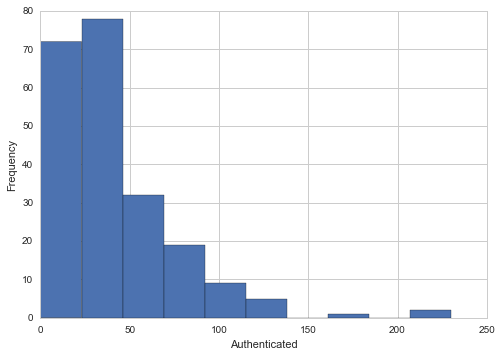

In [18]:
# Plot histogram for variable Associated
df['Authenticated'].hist()
plt.xlabel('Authenticated')
plt.ylabel('Frequency')

The above histogram shows a shape indicative of an exponential distribution. The likelihood of low values occurring is very high but diminishes rapidly for higher values.
Also we can notice outliers here, values that lie far away from the central tendency of a feature.

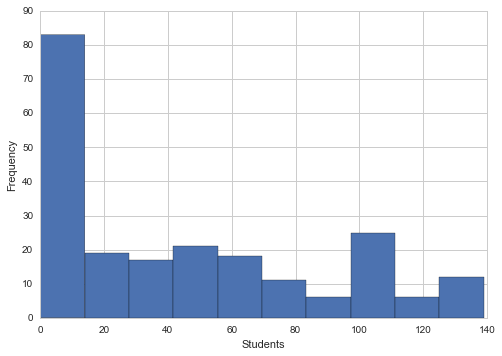

In [19]:
# Plot histogram for variable Registered
df['Students'].hist()
plt.xlabel('Students')
plt.ylabel('Frequency')

##### For continuous features with cardinality less than 10, we use bar plots instead of histograms as this usually produces more informative data visualization

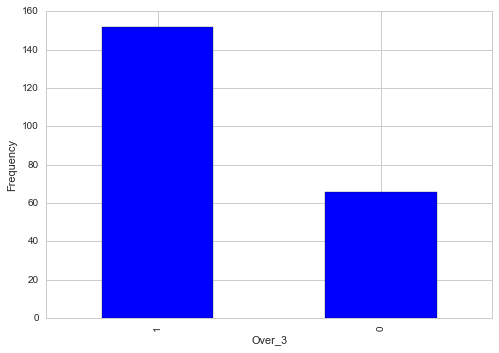

In [20]:
# bar chart for the continuous feature OVER3 with cardinality less than 10
#Number 1 means room in use by 3 or more people, number 0 means in use by less than 3 people
df.Over_3.value_counts().plot(kind='bar')
plt.xlabel('Over_3')
plt.ylabel('Frequency')

In [21]:
#Cound no of room in use by 3 or more people or less than 3 people
df.Over_3.value_counts()

1    152
0     66
Name: Over_3, dtype: int64

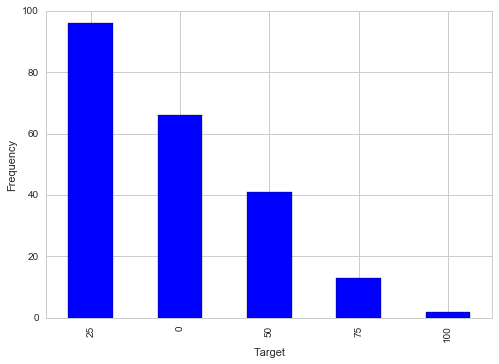

In [22]:
# bar chart for the continuous feature Target with cardinality less than 10
df.Target.value_counts().plot(kind='bar')
plt.xlabel('Target')
plt.ylabel('Frequency')

From the above bar chart we can see that in general the rooms are occupied the most in 25% 

In [23]:
df.Target.value_counts()

25     96
0      66
50     41
75     13
100     2
Name: Target, dtype: int64

During 2 weeks observation we can see 96 rooms are occupied in 25% and 66 rooms are not occupied 41 room are occupied in 50%,
13 rooms are occupied just in 75% and just only 2 rooms are occupied in 100%

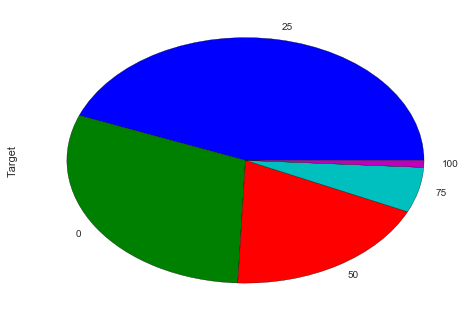

In [24]:
#the same graph as above just presented as a pie chart
target = df['Target'].value_counts()

target.plot(kind='pie')

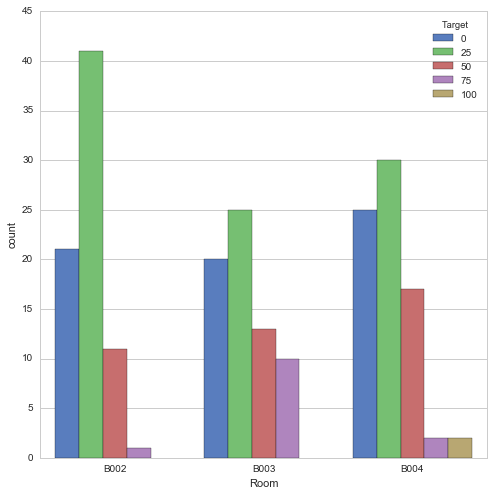

In [25]:
#count plot with target feature split between each room number
plt.figure(figsize=(8,8))
sns.countplot('Room',data=df,hue='Target',palette='muted')


From the above plot we can notice that each room is occupied in 25% the most.

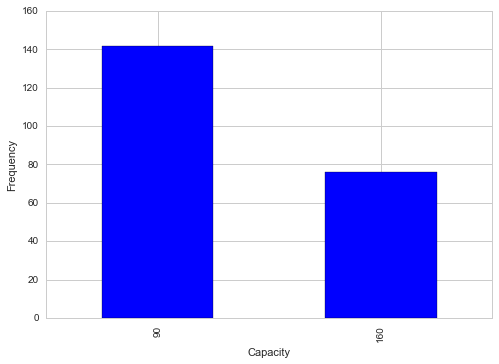

In [26]:
# bar chart for the continuous feature with cardinality less than 10
df.Capacity.value_counts().plot(kind='bar')
plt.xlabel('Capacity')
plt.ylabel('Frequency')

Rooms with capacity of 90 are used more often

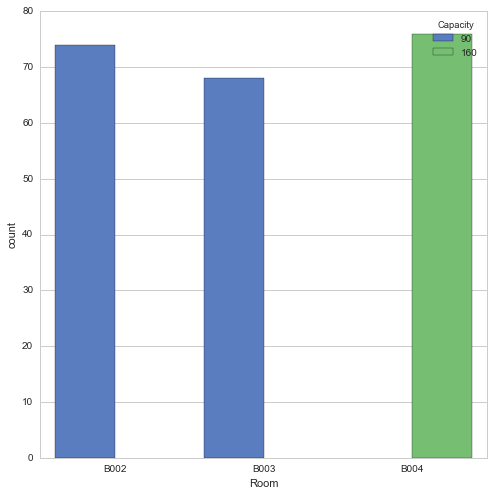

In [27]:
#count plot with target feature split between each room number
plt.figure(figsize=(8,8))
sns.countplot('Room',data=df,hue='Capacity',palette='muted')

The same graph as above but with room number distinction. 

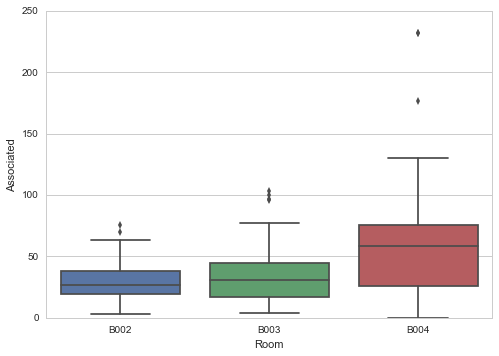

In [28]:
#Plot box plots for feature Associated.

sns.boxplot(x="Room", y="Associated", data=df)


The above box plot, which studies the association between Associated and Room Number clearly identify outliers in the dataset

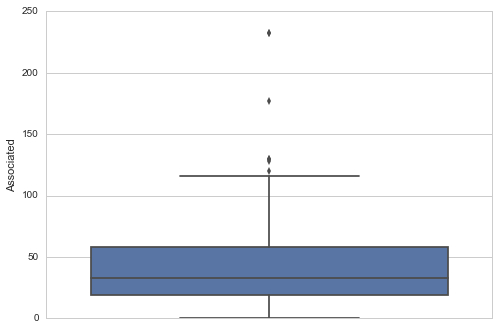

In [53]:
#Plot box plots for feature Associated.

sns.boxplot(y="Associated", data=df)


The box plot for the feature Associated. The lines extending from the box are the whiskers. Any data not included between the whiskers is an outlier.

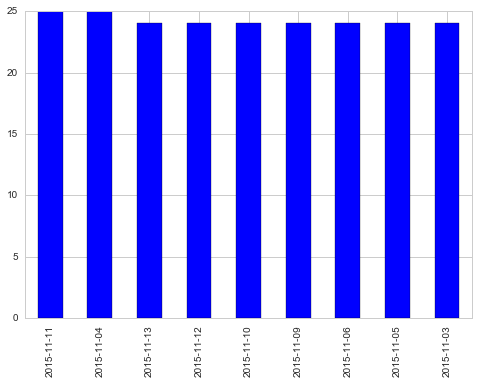

In [32]:
# bar chart for the categorical features. - Date
df.Date.value_counts().plot(kind='bar')

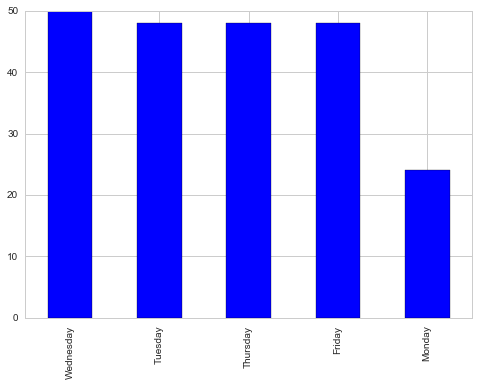

In [33]:
# bar chart for the categorical features.- Day
df.Weekday.value_counts().plot(kind='bar')

From the above bar chart we can clearly see that Monday has less observation than other days. The reason for such a high discrepancy is that wifi data provided were from Tuesday 03.11.2015 for two weeks and survey and ground truth data were provided from 02.11.2015 for two weeks so we are missing one day of observation for wifi data on 02.11.2015

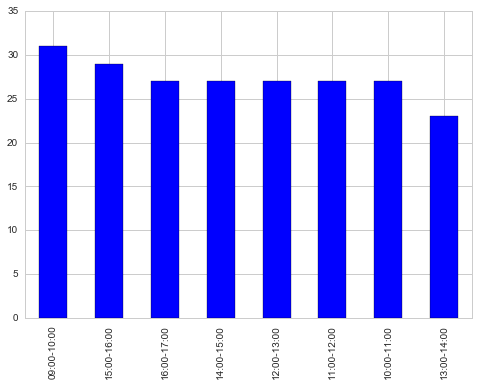

In [34]:
# bar chart for the continuous features.Time
df.Time.value_counts().plot(kind='bar')

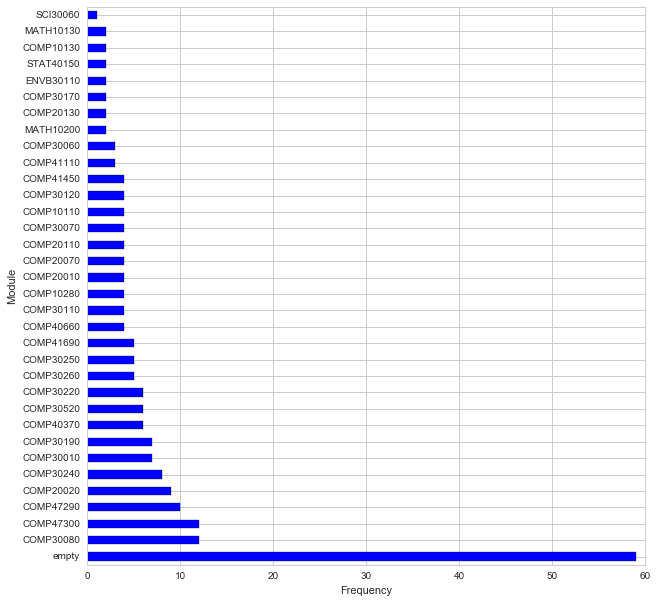

In [35]:
plt.figure(figsize=(10,10))
df.Module.value_counts().plot(kind='barh')
plt.xlabel('Frequency')
plt.ylabel('Module')

The above plot shows which module takes place the most

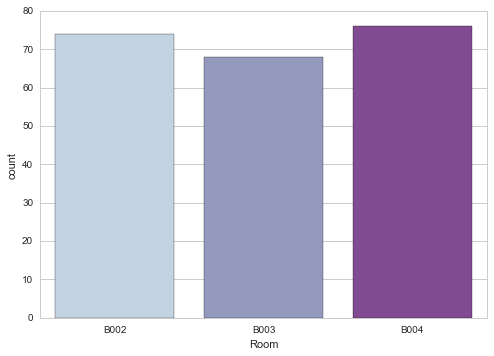

In [36]:
# Seaborn’s countplot for the Categorical features Room

sns.countplot("Room", data=df, palette="BuPu")

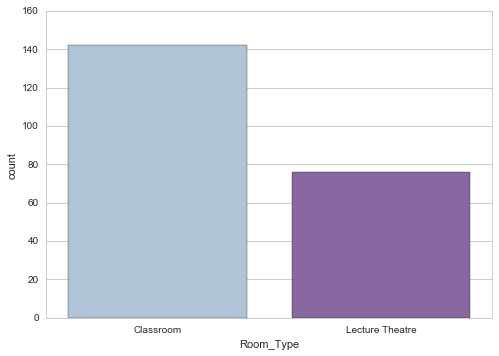

In [37]:
# Seaborn’s countplot for the Categorical features Type

sns.countplot("Room_Type", data=df, palette="BuPu")

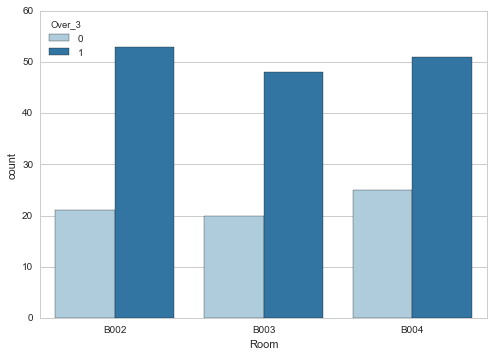

In [38]:
sns.countplot("Room", hue="Over_3", data=df, palette="Paired")

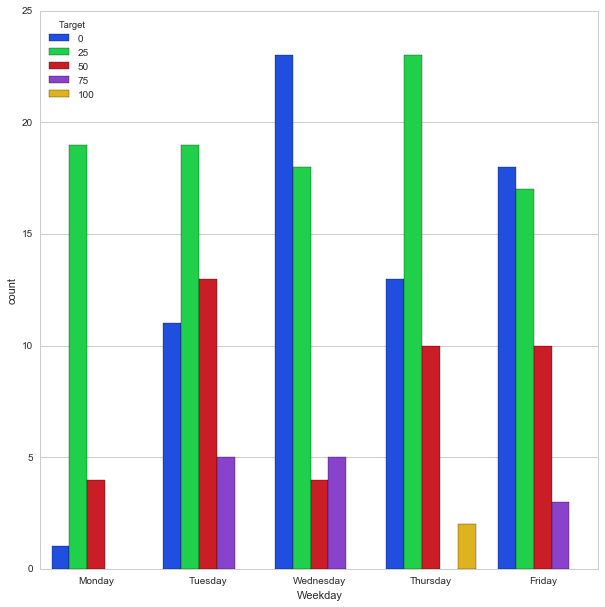

In [39]:
# Factorplot for Day with Target hue

plt.figure(figsize=(10,10))
sns.countplot('Weekday',hue='Target',order=["Monday", "Tuesday", "Wednesday","Thursday","Friday"],data=df,palette='bright')

From the above factorplot we see that on Wednesday we have the highest number of rooms not occupied.
Tuesday seems to be the most occupied day. 

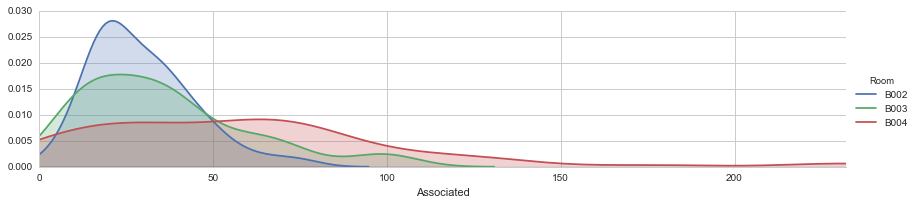

In [40]:
# Another way to visualize the data is to use FacetGrid to plot multiple kedplots on one plot

# Set the figure equal to a facetgrid with the pandas dataframe as its data source, set the hue, and change the aspect ratio.
fig = sns.FacetGrid(df, hue="Room",aspect=4)

# Next use map to plot all the possible kdeplots for the 'Associated' column by the hue choice
fig.map(sns.kdeplot,'Associated',shade= True)

# Set the x max limit with the max
oldest = df['Associated'].max()


fig.set(xlim=(0,oldest))

#Finally add a legend
fig.add_legend()

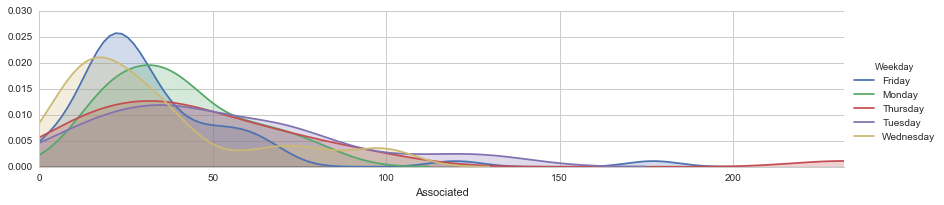

In [41]:
#plot for features weekday and associated
fig = sns.FacetGrid(df, hue="Weekday",aspect=4)
fig.map(sns.kdeplot,'Associated',shade= True)
oldest = df['Associated'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

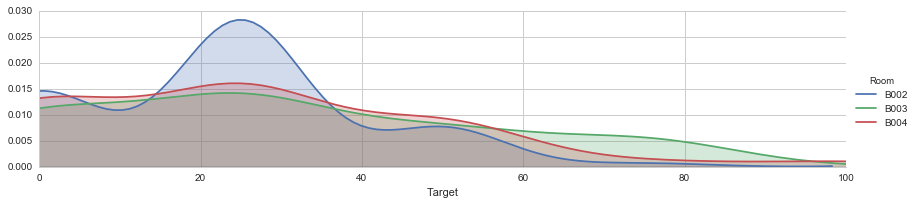

In [42]:
fig = sns.FacetGrid(df, hue="Room",aspect=4)
fig.map(sns.kdeplot,'Target',shade= True)
oldest = df['Target'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

In [43]:
#check the number of associated in total for each room

group1 = df['Associated'].groupby(df['Room'])

#Show the groupby object
group1.sum()

Room
B002    2182
B003    2451
B004    4464
Name: Associated, dtype: float64

<h3>Scatter Plot: show the relationship between two numerical variables</h3>

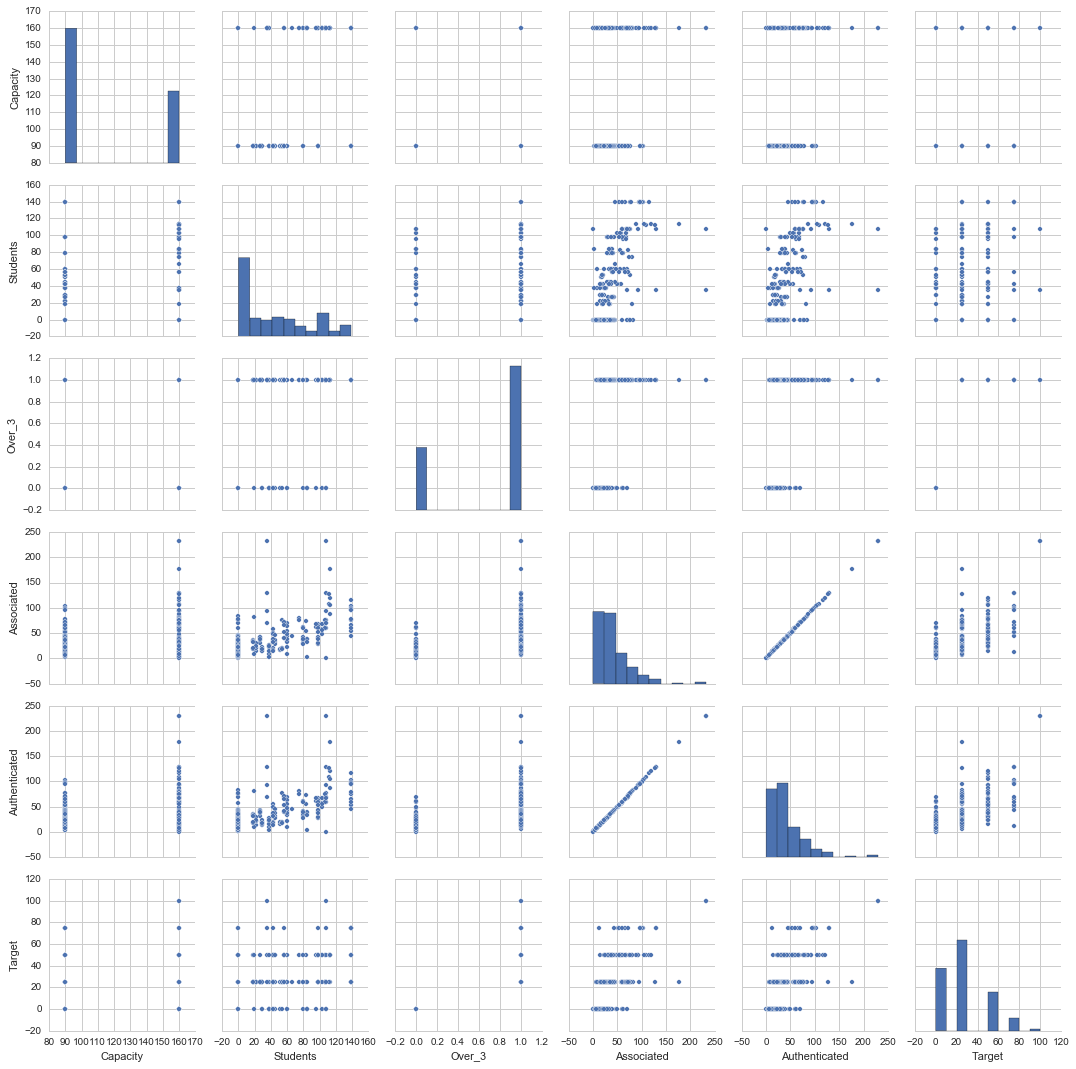

In [44]:
# pairplot on our DataFrame for an automatic visual analysis of all the comparisons( continuous features.)
pairplot = sns.pairplot(df.dropna())
#df.head()

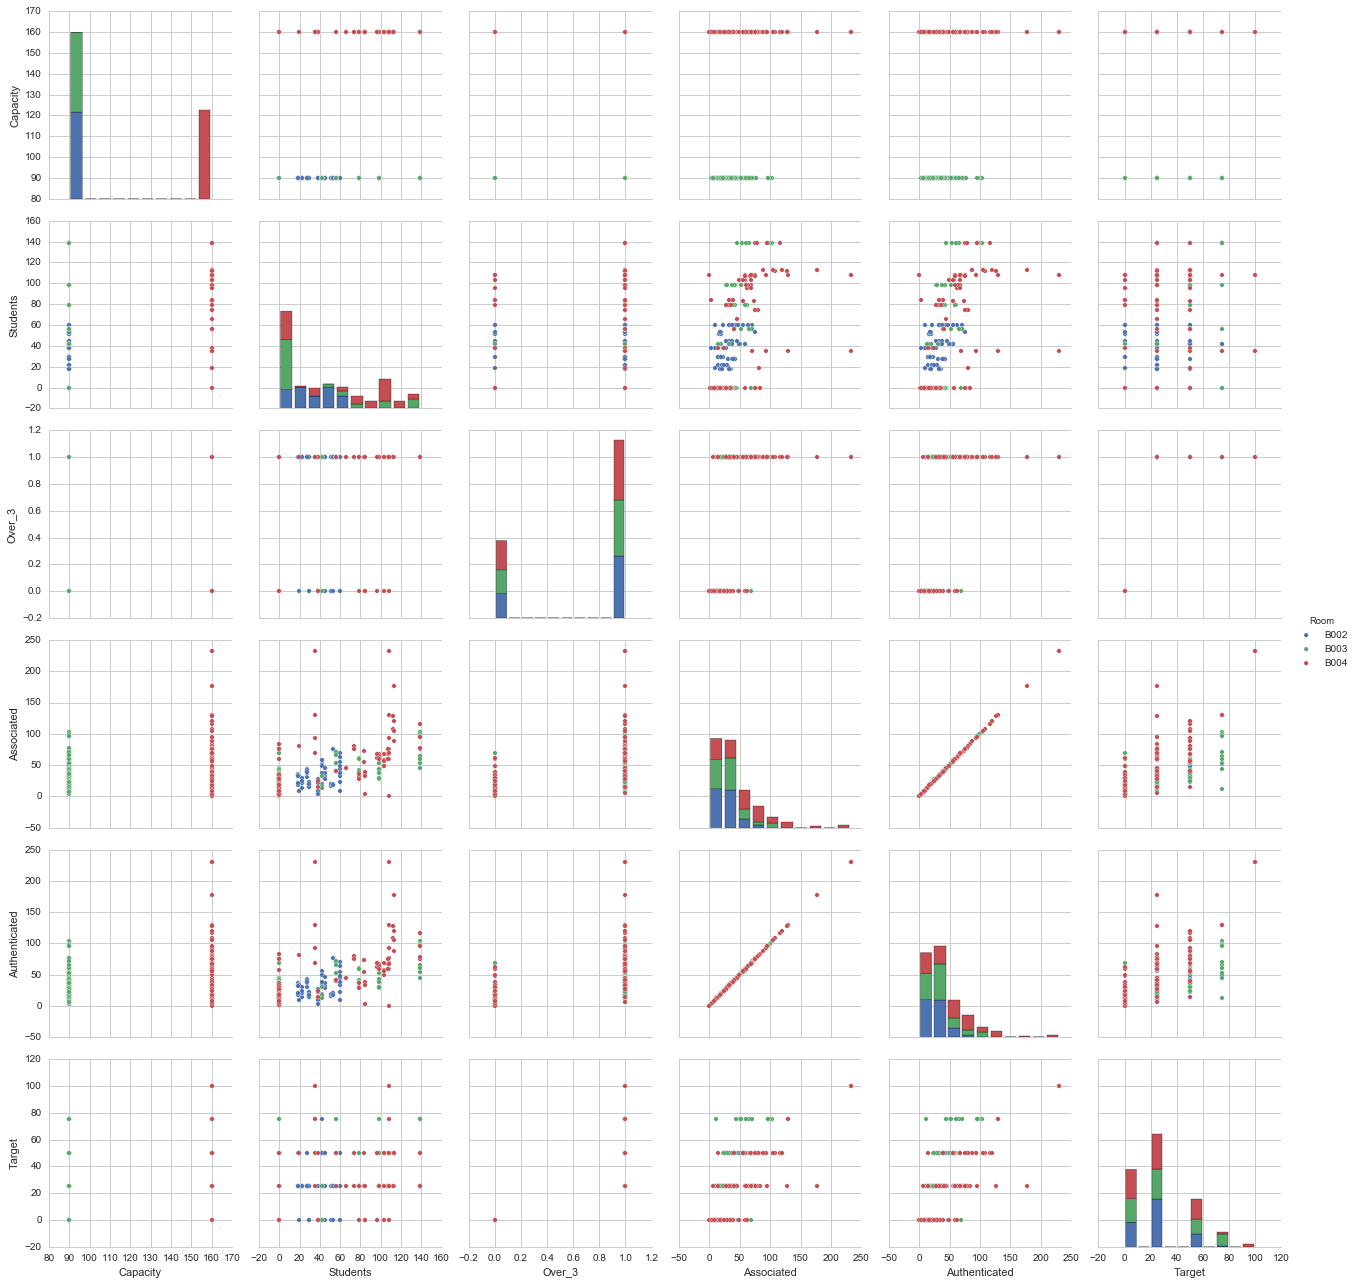

In [45]:
# Another useful seaborn plot is the pairplot, which shows the bivariate relation
# between each pair of features
# From the pairplot, we'll see that the Room Number is separataed from the other

sns.pairplot(df, hue="Room", size=3)

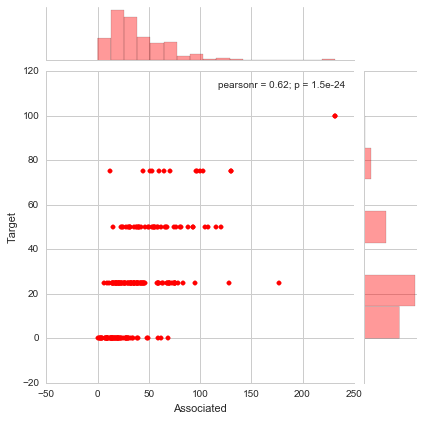

In [46]:
# Comparing our target feature with number of devices show good linear relationship
sns.jointplot('Associated','Target',data=df,kind='scatter',color='red')

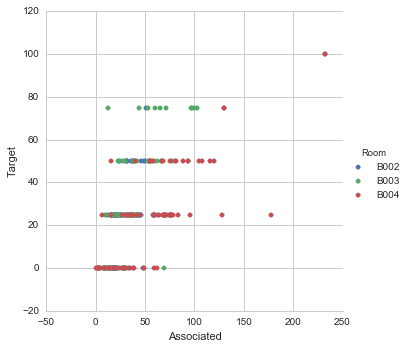

In [47]:
# similar graph as above but with FacetGrid to color the scatterplot by Room number
sns.FacetGrid(df, hue="Room", size=5) \
   .map(plt.scatter, "Associated", "Target") \
   .add_legend()

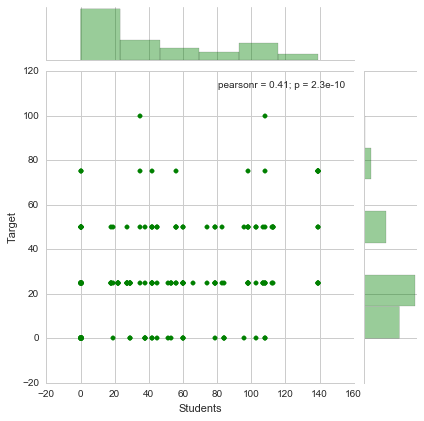

In [48]:
# Comparing our target feature to number of students registred shows a week linear relationship
sns.jointplot('Students','Target',data=df,kind='scatter',color='green')

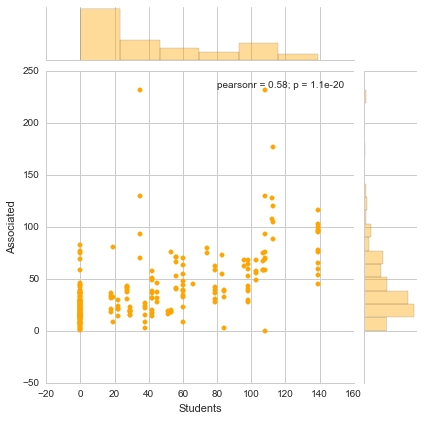

In [49]:
# Comparing number registedred student to number devices shows a good linear relationship
sns.jointplot('Students','Associated',data=df,kind='scatter',color='orange')

In [50]:
# correlation matrix (ranges from 1 to -1)
# Look at correlations for all the continuous features.
df.corr()

,Capacity,Students,Over_3,Associated,Authenticated,Target
Capacity,1.000000,0.319294,-0.041710,0.364760,0.365561,-0.004707
Students,0.319294,1.000000,0.324242,0.576043,0.577619,0.412359
Over_3,-0.041710,0.324242,1.000000,0.420639,0.420788,0.755255
Associated,0.364760,0.576043,0.420639,1.000000,0.999918,0.620179
Authenticated,0.365561,0.577619,0.420788,0.999918,1.000000,0.620040
Target,-0.004707,0.412359,0.755255,0.620179,0.620040,1.000000


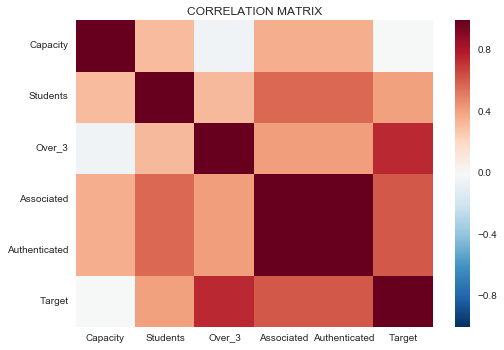

In [51]:
# visualize correlation matrix in Seaborn using a heatmap

sns.heatmap(df.corr())
sns.plt.title('CORRELATION MATRIX')

The above heat map shows good correlation between future Associated and Target. That result could be invistage further by checking linear regression modeling